<a href="https://colab.research.google.com/github/tproffen/SmartRobotCamp/blob/master/Notebooks/Colaboratory/ObjectDetectionDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install --upgrade cvlib  # If it is missing

Requirement already up-to-date: cvlib in /usr/local/lib/python3.6/dist-packages (0.2.4)


In [0]:
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import io
from PIL import Image

VIDEO_HTML = """
<video autoplay
 width=%d height=%d style='cursor: pointer;'></video>
<script>

var video = document.querySelector('video')

navigator.mediaDevices.getUserMedia({ video: true })
  .then(stream=> video.srcObject = stream)
  
var data = new Promise(resolve=>{
  video.onclick = ()=>{
    var canvas = document.createElement('canvas')
    var [w,h] = [video.offsetWidth, video.offsetHeight]
    canvas.width = w
    canvas.height = h
    canvas.getContext('2d')
          .drawImage(video, 0, 0, w, h)
    video.srcObject.getVideoTracks()[0].stop()
    video.replaceWith(canvas)
    resolve(canvas.toDataURL('image/jpeg', %f))
  }
})
</script>
"""
def take_photo(filename='photo.jpg', quality=0.8, size=(400,300)):
  display(HTML(VIDEO_HTML % (size[0],size[1],quality)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  f = io.BytesIO(binary)
  return np.asarray(Image.open(f))

Object recognition next

In [12]:
img = take_photo() # click

In [0]:
from PIL import Image
import requests
from io import BytesIO

url="https://miro.medium.com/max/1744/1*EYFejGUjvjPcc4PZTwoufw.jpeg"
response = requests.get(url)
img = np.asarray(Image.open(BytesIO(response.content)))

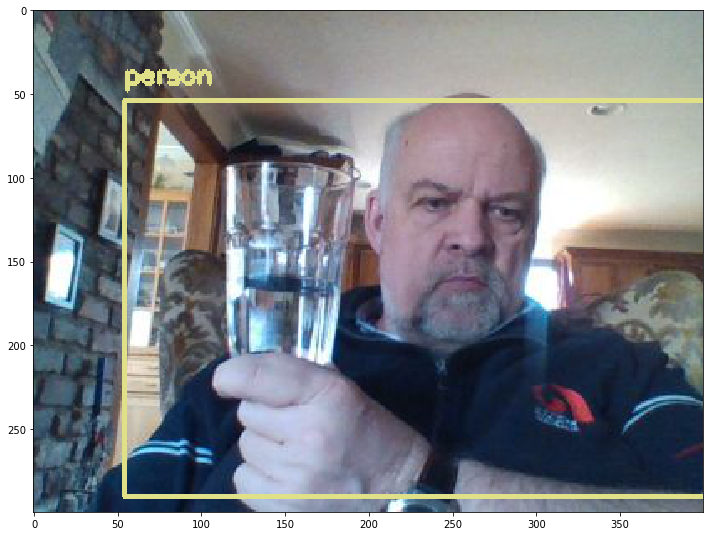

In [13]:
import cvlib as cv
import matplotlib.pyplot as plt
from cvlib.object_detection import draw_bbox

%tensorflow_version 1.x
%matplotlib inline

bbox, label, conf = cv.detect_common_objects(img)
output_image = draw_bbox(img, bbox, label, conf)

plt.figure(figsize=(12,12))
plt.imshow(output_image)
plt.show()

In [15]:
print (label, conf);

['person'] [0.9974735379219055]
